In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import pandas as pd
import numpy as np
import itertools 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import date
from collections import defaultdict

%matplotlib inline

# Importing and Cleaning

In [2]:
jsonFile = 'Digital_Music_5.json'
df = pd.read_json(jsonFile, lines=True)
# df.to_csv('DigitalMusicReviews.csv', sep=',', index=False)

In [3]:
print("Dataframe shape : ", df.shape)
print("Nan values per column",df.isna().sum())

Dataframe shape :  (169781, 12)
Nan values per column overall                0
vote              162170
verified               0
reviewTime             0
reviewerID             0
asin                   0
style              11792
reviewerName           5
reviewText           158
summary               36
unixReviewTime         0
image             169599
dtype: int64


In [4]:
# Dropping columns - style image and vote
df.drop(['style','image','vote'],axis = 1, inplace=True)
df.isna().sum()

overall             0
verified            0
reviewTime          0
reviewerID          0
asin                0
reviewerName        5
reviewText        158
summary            36
unixReviewTime      0
dtype: int64

In [5]:
# Dropping rows wil null values
df.dropna(axis=0,inplace=True)
print("Dataframe shape after dropping nans : ", df.shape)
print("Nan values per column after dropping nans : ",df.isna().sum())

Dataframe shape after dropping nans :  (169606, 9)
Nan values per column after dropping nans :  overall           0
verified          0
reviewTime        0
reviewerID        0
asin              0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
dtype: int64


In [6]:
df.rename(columns={"overall":"rating", "asin":"productID" }, inplace=True)

In [7]:
# reviews_groupby_users_Ratings = df.groupby('reviewerID')['rating']

# reviews_groupby_users_Ratings = pd.DataFrame(reviews_groupby_users_Ratings.count())

# user_list_min50_ratings = reviews_groupby_users_Ratings[reviews_groupby_users_Ratings['rating'] >= 20].index

# trimmed_df =  df[df['reviewerID'].isin(user_list_min50_ratings)]

In [8]:
# uniqueProducts = trimmed_df['productID'].nunique()
# uniqueUsers = trimmed_df['reviewerID'].nunique()
# ratingCount = trimmed_df['rating'].count()
# print("Unique Products : ", uniqueProducts)
# print("Unique Users : ", uniqueUsers)

# df = trimmed_df.copy()

# EDA

ColorMap - https://colorbrewer2.org/#type=sequential&scheme=RdPu&n=3

In [7]:
usersPerRating = df.groupby('rating')['rating'].agg(['count'])
print("Users per Rating : ", usersPerRating)

Users per Rating :           count
rating        
1         2191
2         1812
3         6791
4        23141
5       135671


In [8]:
uniqueProducts = df['productID'].nunique()
uniqueUsers = df['reviewerID'].nunique()
ratingCount = df['rating'].count()
print("Unique Products : ", uniqueProducts)
print("Unique Users : ", uniqueUsers)

Unique Products :  11797
Unique Users :  16560


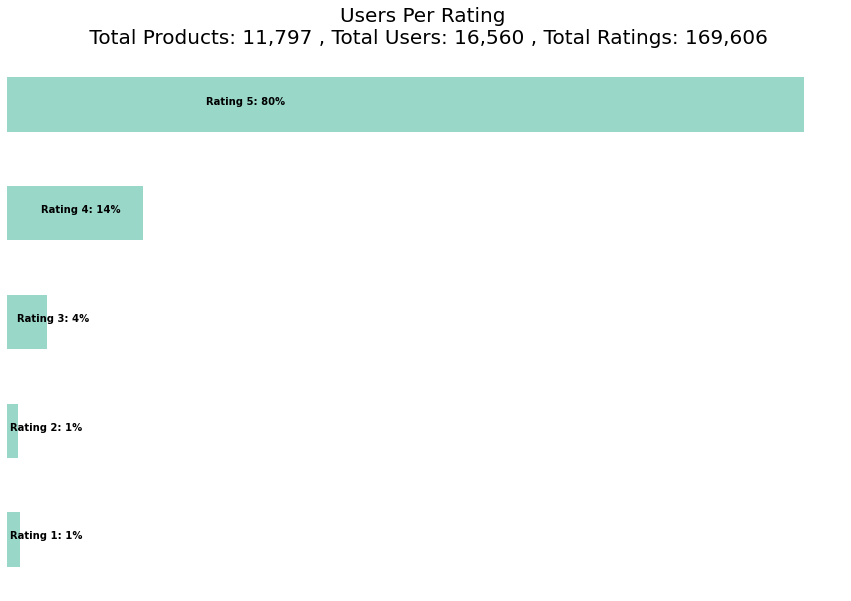

In [9]:
ax = usersPerRating.plot(kind = 'barh', legend = False, figsize = (15,10), color='#99d8c9')
plt.title('Users Per Rating \n Total Products: {:,} , Total Users: {:,} , Total Ratings: {:,}'.format(uniqueProducts, uniqueUsers, ratingCount), fontsize=20)
plt.axis('off')
          
for i in range(1,6):
    ax.text(usersPerRating.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, usersPerRating.iloc[i-1][0]*100 / usersPerRating.sum()[0]), weight = 'bold')

In [10]:
popular_products = pd.DataFrame(df.groupby('productID')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(10)

,rating
productID,
B00CZF8B68,574
B00BWGHIHY,316
B00136J7ZE,294
B00EH49FRE,283
B00136NUG6,262
B0170K9UTO,259
B002HP8EKE,253
B00122X5VG,242
B0092MKTWQ,233


<AxesSubplot:title={'center':'Most popular products'}, xlabel='productID'>

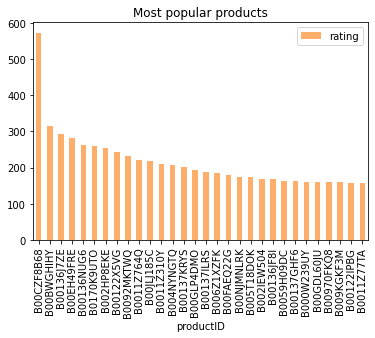

In [11]:
most_popular.head(30).plot(kind = "bar", title='Most popular products', color='#fdae6b')

In [12]:
averageRatingPerProduct = pd.DataFrame(df.groupby('productID')['rating'].mean())
averageRatingPerProduct.head(10)

,rating
productID,
3426958910,4.800000
5557505946,5.000000
5557706259,4.600000
5559166928,4.900000
7799420340,4.784615
9434682614,4.548387
9714721180,4.829268
9721717150,4.526316
B000002TTH,3.571429


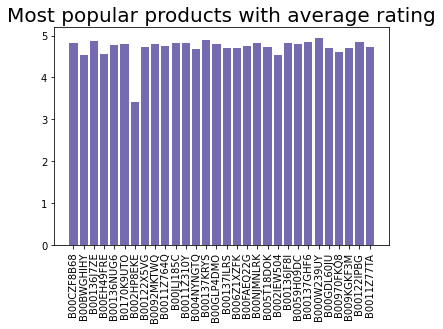

In [13]:
# x values: list of the top 30 most popular product id's
x_values = list(most_popular.index)
x_values = x_values[0:30]

# using list comprehension to get y_values
y_values = [averageRatingPerProduct.loc[averageRatingPerProduct.index == x]['rating'].values[0] for x in x_values]

# plot a bar chart with these x and y values
plt.title('Most popular products with average rating', fontsize=20)
plt.bar(x_values,y_values, color = "#756bb1")
plt.xticks(rotation='vertical')
plt.show()

In [14]:
#products with highest average rating
highest_rated = averageRatingPerProduct.sort_values('rating', ascending=False)
highest_rated

,rating
productID,
B01HJ91MTW,5.00000
B00136PXKC,5.00000
B005GYWUJ4,5.00000
B0017LA5AG,5.00000
B00136PXPW,5.00000
...,...
B00138EYKK,2.00000
B00576405I,2.00000
B0013AZNXA,2.00000


In [15]:
lowest_rated = averageRatingPerProduct.sort_values('rating', ascending=True)
lowest_rated

,rating
productID,
B001KOWH0G,1.12963
B000FWGU84,1.60000
B00138EYKK,2.00000
B00576405I,2.00000
B0013AZNXA,2.00000
...,...
B00137SZC4,5.00000
B00137SYT8,5.00000
B00137SXRQ,5.00000


In [16]:
df.head()

,rating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText,summary,unixReviewTime
0,5,True,"06 3, 2013",A2TYZ821XXK2YZ,3426958910,Garrett,"This is awesome to listen to, A must-have for ...",Slayer Rules!,1370217600
1,5,True,"10 11, 2014",A3OFSREZADFUDY,3426958910,Ad,bien,Five Stars,1412985600
2,5,True,"02 11, 2014",A2VAMODP8M77NG,3426958910,JTGabq,It was great to hear the old stuff again and I...,SLAYER!!!!!!!!!!!!!!!!!!!!!,1392076800
3,4,False,"12 7, 2013",AAKSLZ9IDTEH0,3426958910,john F&#039;n doe,well best of's are a bit poison normally but t...,slayer greatest hits! you mean everything righ...,1386374400
4,5,True,"06 12, 2016",A3OH43OZJLKI09,5557706259,melinda a goodman,What can I say? This is Casting Crowns!!!This ...,"This is a good, blessing filled",1465689600


In [17]:
verifiedUsers = df.groupby('verified')['verified'].agg(['count'])
print("Verified Users : ", verifiedUsers)

Verified Users :             count
verified        
False      20835
True      148771


<AxesSubplot:xlabel='verified'>

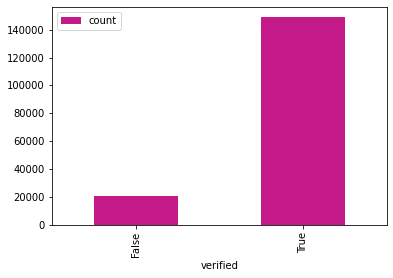

In [18]:
verifiedUsers.plot(kind='bar', color='#c51b8a')

In [20]:
# getting number of ratings per reviewer
ratingsPerUser = pd.DataFrame(df.groupby('reviewerID')['rating'].count())
ratingsPerUser = ratingsPerUser.sort_values('rating', ascending=False)
ratingsPerUser

,rating
reviewerID,
A3W4D8XOGLWUN5,791
A2H3JURQZOHVMB,314
A36EDWL4F3AASU,223
A165P3MOJV3OVZ,219
AVKHYC2D7MD56,214
...,...
ALR4BAAI5U189,2
A3CY40LNIH6MUT,2
A2VWLNEBMW4ITQ,2


<AxesSubplot:title={'center':'Reviewer Frequency'}, xlabel='reviewerID'>

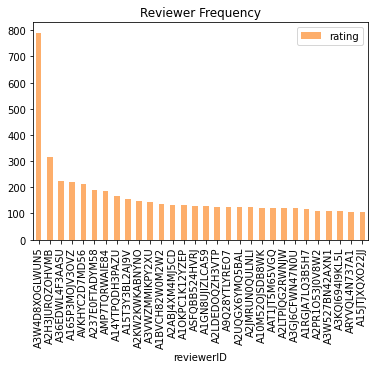

In [21]:
ratingsPerUser.head(30).plot(kind = "bar", title='Reviewer Frequency', color='#fdae6b')

In [22]:
# Looping through the df rows and creating a dictionary
# key: year corresponding to unixReviewTime
# value: number of ratings 
ratingTimes = defaultdict(int)
for index, row in df.iterrows():
  timestamp = date.fromtimestamp(row['unixReviewTime'])
  ratingTimes[timestamp.year] += 1

In [23]:
myList = ratingTimes.items()
myList = sorted(myList)
x, y = zip(*myList) 

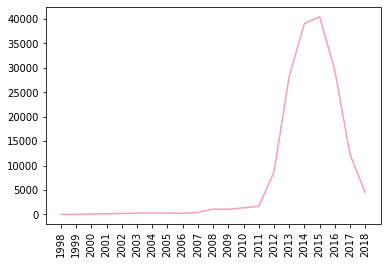

In [24]:
plt.plot(x, y, color='#fa9fb5')
plt.xticks(range(myList[0][0], myList[len(myList)-1][0]+1))
plt.xticks(rotation='vertical')
plt.show()

# Data splitting

In [ ]:
!pip install scikit-surprise

In [25]:
from surprise import Reader, Dataset
from surprise import SVD, NMF, KNNBasic, accuracy
from surprise.model_selection import cross_validate, KFold
# from surprise.model_selection import train_test_split
from sklearn.model_selection import train_test_split

In [26]:
truncated_df = df[['reviewerID', 'productID', 'rating']]
truncated_df

,reviewerID,productID,rating
0,A2TYZ821XXK2YZ,3426958910,5
1,A3OFSREZADFUDY,3426958910,5
2,A2VAMODP8M77NG,3426958910,5
3,AAKSLZ9IDTEH0,3426958910,4
4,A3OH43OZJLKI09,5557706259,5
...,...,...,...
169776,A1SR2T84IXOMAQ,B01HJ91MTW,5
169777,A2SR3DWJR1PYR6,B01HJ91MTW,5
169778,A24V7X30NIMOIY,B01HJ91MTW,5
169779,A1LW10GYP2EYM1,B01HJ91MTW,5


In [27]:
# traindata, testdata = train_test_split(truncated_df, test_size=.2, stratify=truncated_df['reviewerID'])
traindata, testdata = train_test_split(truncated_df, test_size=.2)

In [28]:
reader = Reader(rating_scale=(0.5, 5.0))
trainset = Dataset.load_from_df(traindata[['reviewerID', 'productID', 'rating']], reader)
testset = Dataset.load_from_df(testdata[['reviewerID', 'productID', 'rating']], reader)

# Recommendation Techniques

In [29]:
def runKFoldCV(trainset, algorithm):
  kf = KFold(n_splits=3)
  for trainKF, testKF in kf.split(trainset):

      # fit
      algorithm.fit(trainKF)

      # predict
      predictions = algorithm.test(testKF)

      # Compute and print RMSE, MAE
      accuracy.rmse(predictions, verbose=True)
      accuracy.mae(predictions, verbose=True)

  return algorithm

def getFinalResults(testset, algorithm):
  print("Final results")
  test_predictions = getPredictions(testset, algorithm)
  test_rmse = accuracy.rmse(test_predictions)
  test_mae = accuracy.mae(test_predictions)
  return test_predictions

def getPredictions(testset, algorithm):
  testRaw = testset.construct_testset(testset.raw_ratings)
  predictions = algorithm.test(testRaw)
  return predictions


In [30]:

def get_top_n(predictions, n):
  # First map the predictions to each user.
  top_n = defaultdict(list)
  org_ratings = defaultdict(list)

  for uid, iid, true_r, est, _ in predictions:
    top_n[uid].append((iid, est))
    org_ratings[uid].append((iid, true_r))

  # Then sort the predictions for each user and retrieve the k highest ones.
  for uid, user_ratings in top_n.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    top_n[uid] = user_ratings[:n]

  return top_n, org_ratings

def dcg_at_k(scores):
  return scores[0] + sum(sc/math.log(ind, 2) for sc, ind in zip(scores[1:], range(2, len(scores) + 1)))

def ndcg_at_k(scores):
  idcg = dcg_at_k(sorted(scores, reverse=True))
  return (dcg_at_k(scores)/idcg) if idcg > 0.0 else 0.0

def get_ndcg(predictions, n=10):
  top_n, org_ratings = get_top_n(predictions, n=10)
  
  ndcg_scores = dict()
  for uid, user_ratings in top_n.items():
    scores = []
    for iid, est_r in user_ratings:
      iid_found = False
      org_user_ratings = org_ratings[uid]
      for i, r in org_user_ratings:
        if iid == i:
          scores.append(r)
          iid_found = True
          break
      if not iid_found:
        scores.append(0)
    ndcg_scores[uid] = ndcg_at_k(scores)

  ndcg_score = sum(ndcg for ndcg in ndcg_scores.values())/len(ndcg_scores)
  return ndcg_score

# returns f-measure based on precision and recall
def get_f_measure(precision, recall):
  return (2*precision*recall)/(precision + recall)

def get_final_metrics(predictions):
  precisions, recalls = precision_recall_at_k(predictions)
  precision = sum(precisions.values())/len(precisions)
  recall = sum(recalls.values())/len(recalls)
  f1 = get_f_measure(precision, recall)
  ndcg = get_ndcg(predictions, n=10)
  print("Precision : ", precision)
  print("Recall : ", recall)
  print("F1 Score : ", f1)
  print("NGCG : ", ndcg)



def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls



## User-based KNN with MSD

In [31]:
# KNN using Mean Squared Difference
algorithm = KNNBasic()
algorithm = runKFoldCV(trainset, algorithm)
predictions = getFinalResults(testset, algorithm)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7410
MAE:  0.4328
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7283
MAE:  0.4288
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7301
MAE:  0.4281
Final results
RMSE: 0.7364
MAE:  0.4301


In [32]:
get_final_metrics(predictions)

Precision :  0.9354334517673364
Recall :  0.9451533825659346
F1 Score :  0.9402682981311821
NGCG :  0.8374343494098236


## User-based KNN with Cosine Similarity

In [33]:
# KNN with cosine similarity

sim_options = {'name': 'cosine'
               }
algorithm = KNNBasic(sim_options=sim_options)
algorithm = runKFoldCV(trainset, algorithm)
predictions =  getFinalResults(testset, algorithm)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7789
MAE:  0.4743
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7847
MAE:  0.4777
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7783
MAE:  0.4751
Final results
RMSE: 0.7761
MAE:  0.4748


In [34]:
get_final_metrics(predictions)

Precision :  0.9336707034312506
Recall :  0.9431566636986979
F1 Score :  0.938389711343615
NGCG :  0.8371616347196189


## Item-based KNN with MSD

In [35]:
# KNN with MSD

sim_options = {'name': 'MSD',
               'user_based': False 
               }
algorithm = KNNBasic(sim_options=sim_options)
algorithm = runKFoldCV(trainset, algorithm)
predictions =  getFinalResults(testset, algorithm)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.6156
MAE:  0.3361
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.6254
MAE:  0.3382
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.6233
MAE:  0.3397
Final results
RMSE: 0.6206
MAE:  0.3387


In [36]:
get_final_metrics(predictions)

Precision :  0.9365240216088443
Recall :  0.9497489620254836
F1 Score :  0.9430901308051203
NGCG :  0.8435051053804237


## Item-based KNN with cosine similarity

In [37]:
# KNN with cosine similarity

sim_options = {'name': 'cosine',
               'user_based': False 
               }
algorithm = KNNBasic(sim_options=sim_options)
algorithm = runKFoldCV(trainset, algorithm)
predictions =  getFinalResults(testset, algorithm)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6345
MAE:  0.3527
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6431
MAE:  0.3568
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.6456
MAE:  0.3583
Final results
RMSE: 0.6363
MAE:  0.3554


In [38]:
get_final_metrics(predictions)

Precision :  0.9347973158136801
Recall :  0.9483248081957674
F1 Score :  0.9415124743300811
NGCG :  0.8432162685787176


## SVD

In [39]:
# SVD
algorithm = SVD()
algorithm = runKFoldCV(trainset, algorithm)
predictions = getFinalResults(testset, algorithm)

RMSE: 0.5822
MAE:  0.3558
RMSE: 0.5874
MAE:  0.3593
RMSE: 0.5892
MAE:  0.3598
Final results
RMSE: 0.5892
MAE:  0.3604


In [40]:
get_final_metrics(predictions)

Precision :  0.9390098250179326
Recall :  0.9592629357652823
F1 Score :  0.9490283378322296
NGCG :  0.8244678892729881


## NMF

In [41]:
# NMF
algorithm = NMF()
algorithm = runKFoldCV(trainset, algorithm)
predictions =  getFinalResults(testset, algorithm)

RMSE: 0.7789
MAE:  0.5880
RMSE: 0.7916
MAE:  0.5963
RMSE: 0.7932
MAE:  0.5977
Final results
RMSE: 0.7882
MAE:  0.5972


In [42]:
get_final_metrics(predictions)

Precision :  0.9017115738854222
Recall :  0.8848567172356707
F1 Score :  0.8932046394498382
NGCG :  0.8233368362863972
